# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [5]:
# Calculando o número de saudáveis e doentes para cada categoria de sexo
healthy_counts = df[df['num'] == 0].groupby('sex').size()
sick_counts = df[df['num'] > 0].groupby('sex').size()

# Calculando o total de indivíduos para cada categoria de sexo
total_counts = df.groupby('sex').size()

# Calculando a quantidade média de doentes para cada categoria de sexo
mean_sick = sick_counts / total_counts

# Calculando a Odds (razão de chances) para cada categoria de sexo
odds = sick_counts / healthy_counts

# Calculando o Odds ratio em relação ao sexo masculino 
odds_ratio = odds / odds[1]

# Calculando o logito (LOG(Odds)) para cada categoria de sexo
logit = odds.apply(lambda x: np.log(x))

# Calculando o WOE (Weight of Evidence) para cada categoria de sexo
woe = logit - np.log(odds_ratio[1])

# Exibindo os resultados
results = pd.DataFrame({'Healthy': healthy_counts,
                        'Sick': sick_counts,
                        'Total': total_counts,
                        'Mean Sick': mean_sick,
                        'Odds': odds,
                        'Odds Ratio': odds_ratio,
                        'Logit': logit,
                        'WOE': woe})
print(results)

     Healthy  Sick  Total  Mean Sick      Odds  Odds Ratio    Logit      WOE
sex                                                                         
0.0       72    25     97   0.257732  0.347222    0.280214 -1.05779 -1.05779
1.0       92   114    206   0.553398  1.239130    1.000000  0.21441  0.21441


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [16]:
# Categorizando a variável 'age' em 5 grupos
df['age_group'] = pd.cut(df['age'], bins=5)

# Calculando as estatísticas para cada grupo
group_stats = df.groupby('age_group').agg({'num': ['count', 'sum'], 'age': 'mean'})

# Renomeando as colunas para facilitar a interpretação
group_stats.columns = ['Total', 'Sick', 'Mean Age']

# Calculando as médias das estatísticas
total_mean_age = df['age'].mean()
total_mean_sick = df['num'].sum() / len(df)

# Calculando a probabilidade para cada grupo
group_stats['Probability'] = group_stats['Sick'] / group_stats['Total']

# Filtrando valores que causam RuntimeWarning ao calcular o logaritmo
group_stats_filtered = group_stats[group_stats['Probability'] > 0]

# Calculando o Odds ratio em relação ao grupo de idade média (referência)
group_stats_filtered['Odds Ratio'] = group_stats_filtered['Probability'] / total_mean_sick

# Calculando o logito (LOG(Odds)) para cada grupo
with np.errstate(divide='ignore'):  # Suprimindo os avisos de RuntimeWarning
    group_stats_filtered['Logit'] = group_stats_filtered['Probability'].apply(lambda x: np.log(x))

# Calculando o WOE (Weight of Evidence) para cada grupo
group_stats_filtered['WOE'] = group_stats_filtered['Logit'] - np.log(group_stats_filtered['Odds Ratio'])

# Exibindo os resultados
print(group_stats_filtered)

                Total  Sick   Mean Age  Probability  Odds Ratio     Logit  \
age_group                                                                   
(28.952, 38.6]     11     6  35.181818     0.545455    0.581946 -0.606136   
(38.6, 48.2]       71    38  43.704225     0.535211    0.571018 -0.625094   
(48.2, 57.8]       97    84  53.567010     0.865979    0.923915 -0.143894   
(57.8, 67.4]      107   137  61.775701     1.280374    1.366033  0.247152   
(67.4, 77.0]       17    19  70.529412     1.117647    1.192419  0.111226   

                     WOE  
age_group                 
(28.952, 38.6] -0.064759  
(38.6, 48.2]   -0.064759  
(48.2, 57.8]   -0.064759  
(57.8, 67.4]   -0.064759  
(67.4, 77.0]   -0.064759  


C:\Users\Donegá\AppData\Local\Temp\ipykernel_11116\954728229.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = df.groupby('age_group').agg({'num': ['count', 'sum'], 'age': 'mean'})


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

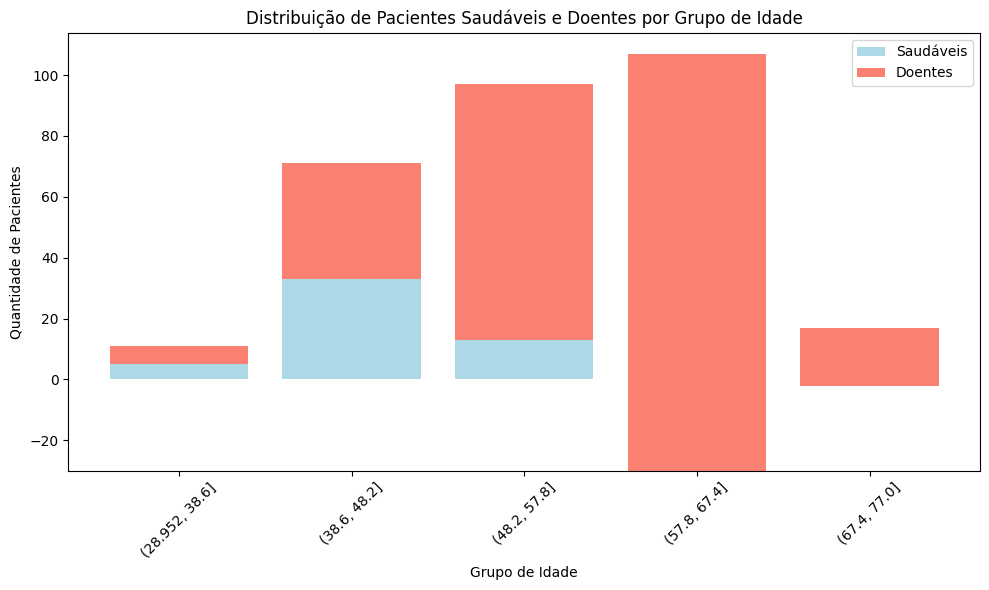

In [17]:
# Reordenando os grupos para garantir uma ordem crescente de idade
group_stats_filtered.sort_index(inplace=True)

# Obtendo os grupos de idade e as quantidades de pacientes saudáveis e doentes
age_groups = group_stats_filtered.index.astype(str)
healthy_counts = group_stats_filtered['Total'] - group_stats_filtered['Sick']
sick_counts = group_stats_filtered['Sick']

# Criando o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
plt.bar(age_groups, healthy_counts, label='Saudáveis', color='lightblue')
plt.bar(age_groups, sick_counts, bottom=healthy_counts, label='Doentes', color='salmon')

# Adicionando rótulos e títulos
plt.xlabel('Grupo de Idade')
plt.ylabel('Quantidade de Pacientes')
plt.title('Distribuição de Pacientes Saudáveis e Doentes por Grupo de Idade')
plt.xticks(rotation=45)
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()